In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
1,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
2,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
3,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
4,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000,0.000,0.007,0.000,0.0,0.000,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2121,140.0,0.001,0.000,0.007,0.000,0.0,0.000,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.000,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2123,140.0,0.001,0.000,0.006,0.000,0.0,0.000,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
px.histogram(df, x="fetal_health", color="fetal_health",labels={"fetal_health":"Fetal Health Status"},width=800,height=800)

In [4]:
fig = px.box(df.drop(["fetal_health"],axis=1),title="Box Plot of the Dataset",width=1200,height=1200,labels={"variable":"Features"})
fig.show()

**Scalling the Data**

Using SMOTE(Synthetic Minority Oversampling Technique) to generates synthetic data for the minority class which.

In [5]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X = df.drop(["fetal_health"],axis=1)
y = df['fetal_health']

In [6]:
X_smote, y_smote = smote.fit_resample(X, y)

In [7]:
y_smote.value_counts()

1.0    1655
3.0    1655
2.0    1655
Name: fetal_health, dtype: int64

In [8]:
#New dataset after over-sampeling the minority class
df_new = X_smote.assign(status = y_smote)
df_new

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,status
0,132.000000,0.006,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,1.0
1,133.000000,0.003,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,1.0
2,134.000000,0.003,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.0
3,132.000000,0.007,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.0
4,134.000000,0.001,0.000000,0.010000,0.009000,0.0,0.002000,26.000000,5.900000,0.000000,...,50.000000,200.000000,5.000000,3.000000,76.000000,107.000000,107.000000,170.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,126.070470,0.000,0.173993,0.005465,0.002000,0.0,0.002512,28.046980,3.174161,0.000000,...,52.046980,188.835569,10.558725,0.488255,127.535235,104.488255,116.582215,127.746646,0.000000,3.0
4961,132.899520,0.000,0.000176,0.006925,0.000000,0.0,0.000000,64.025120,0.400000,80.799040,...,126.025120,137.899520,1.000000,0.000000,132.949760,131.949760,133.949760,0.000000,0.000000,3.0
4962,133.673779,0.000,0.000270,0.009865,0.004482,0.0,0.002000,60.000000,2.946098,0.000000,...,57.595733,161.865244,5.404267,0.269512,123.921953,95.539023,104.886581,88.652442,0.000000,3.0
4963,144.000000,0.000,0.002000,0.002000,0.000000,0.0,0.000000,84.000000,0.300000,33.995080,...,132.000000,170.000000,2.000000,0.000000,144.000000,143.000000,145.000000,0.000000,-1.000000,3.0


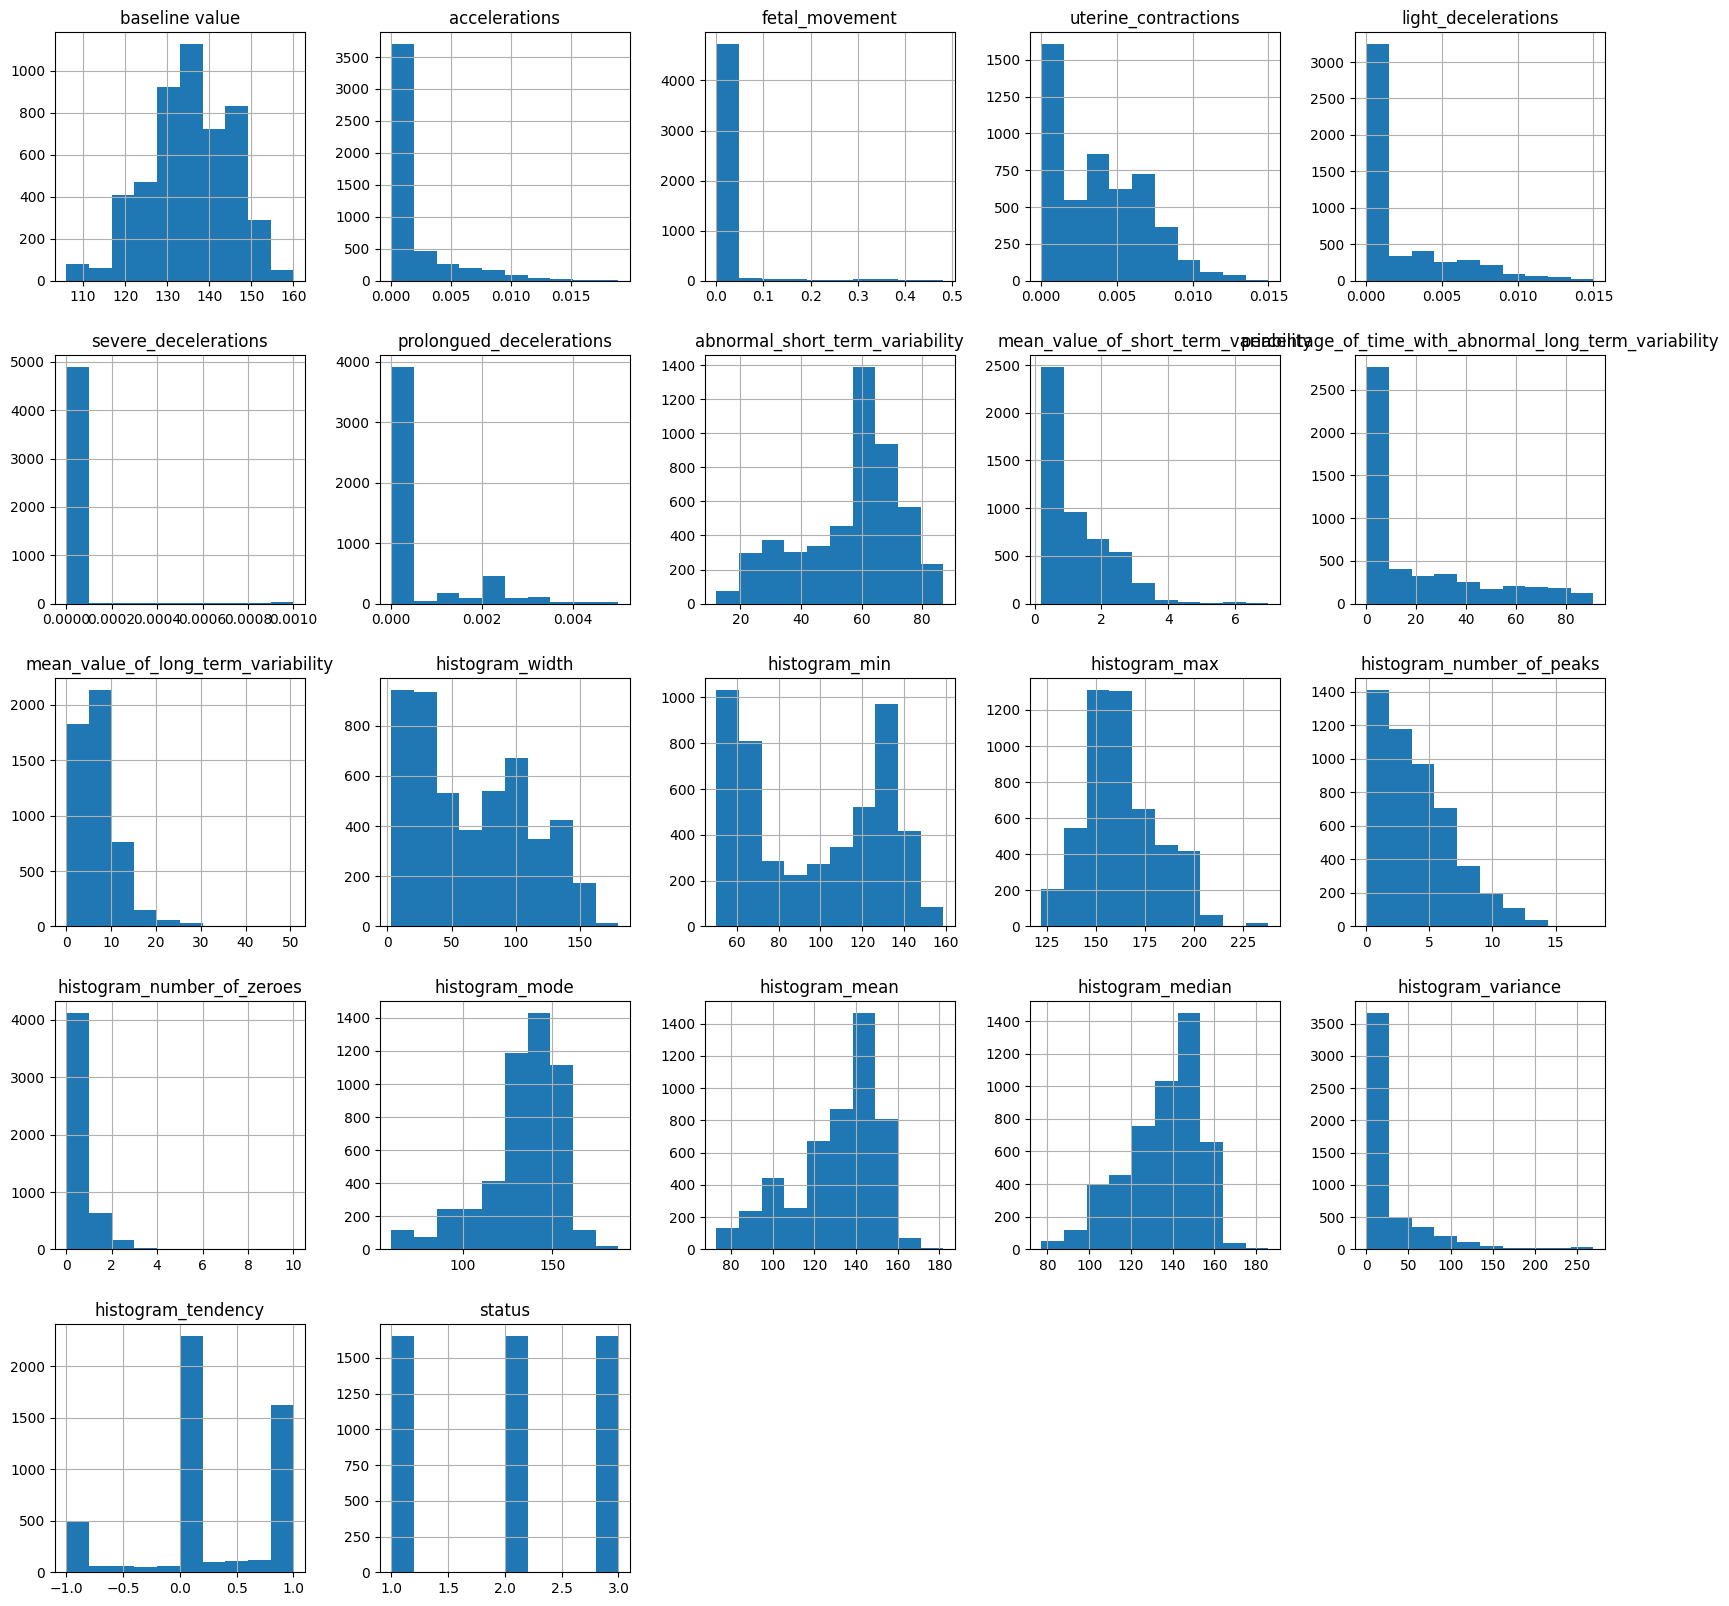

In [9]:
# Evaluating distributions of the features 
hist_plot = df_new.hist(figsize = (20,20))

**Feature Selectiion using correlation**


In [10]:
# Examining correlation matrix using heatmap
df_corr = df_new.corr()
fig = px.imshow(df_corr,
                x = df_corr.columns,
                y = df_corr.columns,
                title = 'Correlation Matrix',
                labels = dict(x="Features", y="Features", color="corelation"),
                height = 2000,
                width = 2000,
                text_auto=True)
fig.update_yaxes()
fig.show()

In [11]:
corr_matrix = df_new.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df_new.drop(to_drop, axis=1, inplace=True)


In [12]:
df_new.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_variance',
       'histogram_tendency', 'status'],
      dtype='object')

In [13]:
df_new

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,status
0,132.000000,0.006,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,10.400000,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,12.000000,0.000000,1.0
1,133.000000,0.003,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,13.400000,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,13.000000,0.000000,1.0
2,134.000000,0.003,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,23.000000,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,13.000000,1.000000,1.0
3,132.000000,0.007,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,19.900000,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,11.000000,1.000000,1.0
4,134.000000,0.001,0.000000,0.010000,0.009000,0.0,0.002000,26.000000,5.900000,0.000000,0.000000,150.000000,50.000000,200.000000,5.000000,3.000000,76.000000,170.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,126.070470,0.000,0.173993,0.005465,0.002000,0.0,0.002512,28.046980,3.174161,0.000000,13.821979,136.788589,52.046980,188.835569,10.558725,0.488255,127.535235,127.746646,0.000000,3.0
4961,132.899520,0.000,0.000176,0.006925,0.000000,0.0,0.000000,64.025120,0.400000,80.799040,3.705024,11.874400,126.025120,137.899520,1.000000,0.000000,132.949760,0.000000,0.000000,3.0
4962,133.673779,0.000,0.000270,0.009865,0.004482,0.0,0.002000,60.000000,2.946098,0.000000,0.000000,104.269512,57.595733,161.865244,5.404267,0.269512,123.921953,88.652442,0.000000,3.0
4963,144.000000,0.000,0.002000,0.002000,0.000000,0.0,0.000000,84.000000,0.300000,33.995080,5.500328,38.000000,132.000000,170.000000,2.000000,0.000000,144.000000,0.000000,-1.000000,3.0


**Scaling the Data**

In [14]:
X= df_new.drop(["status"],axis=1)
y= df_new["status"]

In [15]:
col_names = list(X.columns)
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   

In [16]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,4965.0,1.213576e-15,1.000101,-2.992704,-0.649044,-0.074179,0.792934,2.532281
accelerations,4965.0,-9.159060e-17,1.000101,-0.522696,-0.522696,-0.522696,0.152971,5.896142
fetal_movement,4965.0,-4.007089e-17,1.000101,-0.250511,-0.250511,-0.235660,-0.172421,9.139747
uterine_contractions,4965.0,-1.259371e-16,1.000101,-1.185843,-0.948679,-0.120874,0.759369,3.677187
light_decelerations,4965.0,-2.862206e-17,1.000101,-0.635666,-0.635666,-0.635666,0.321003,4.147679
severe_decelerations,4965.0,-5.151971e-17,1.000101,-0.111005,-0.111005,-0.111005,-0.111005,10.464485
prolongued_decelerations,4965.0,9.159060e-17,1.000101,-0.474374,-0.474374,-0.474374,-0.474374,4.732633
abnormal_short_term_variability,4965.0,0.000000e+00,1.000101,-2.675367,-0.628436,0.272874,0.635845,1.839922
mean_value_of_short_term_variability,4965.0,-3.577758e-17,1.000101,-1.019862,-0.817960,-0.330486,0.595357,5.844819
percentage_of_time_with_abnormal_long_term_variability,4965.0,4.579530e-17,1.000101,-0.748693,-0.748693,-0.553484,0.541350,2.804106


In [17]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.2,shuffle=True, stratify=y)

In [18]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency
2817,0.971383,-0.437840,-0.064727,-1.104412,-0.555569,-0.111005,-0.474374,0.605036,-0.717008,0.939541,0.587629,-0.579165,0.643133,-0.216295,0.443531,-0.449347,0.892752,-0.474743,1.212076
92,1.304506,-0.522696,-0.250511,-1.185843,-0.635666,-0.111005,-0.474374,0.696049,-0.918911,2.179438,-0.460354,-0.945575,0.944609,-0.544004,-0.314786,-0.449347,0.744582,-0.576354,1.212076
2454,1.489778,0.490805,-0.223250,-1.185843,-0.635666,-0.111005,-0.474374,-0.082443,-0.616057,-0.748693,-0.170266,-0.975981,1.586340,0.545571,-1.147025,0.336753,1.161046,-0.552479,-1.249344
2072,-0.537155,1.842139,-0.230988,-0.861641,-0.635666,-0.111005,-0.474374,0.876661,-0.515106,-0.553484,-0.599575,-0.808131,0.914447,-0.270913,-0.989902,-0.449347,0.243266,-0.504728,-0.391942
727,-1.560301,0.490805,0.081370,0.110965,-0.635666,-0.111005,-0.474374,-0.387620,-0.515106,-0.514443,0.076640,0.635034,-1.106393,-0.489386,-0.652344,-0.449347,-0.485922,-0.409226,1.212076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,-0.741784,-0.522696,-0.223420,1.344928,1.020598,-0.111005,1.608429,0.563971,1.627544,-0.748693,-1.355345,1.436792,-1.015908,1.586107,0.632455,0.736204,-1.300228,-0.075706,-1.685027
1182,-1.560301,-0.522696,-0.250511,1.731975,-0.635666,-0.111005,-0.474374,-0.447824,-0.313204,-0.592526,1.667736,-0.624872,-0.050730,-1.581751,0.360331,-0.449347,-0.531496,-0.504728,1.212076
2141,0.358789,-0.011375,-0.191944,-0.949271,0.088307,-0.111005,0.032238,-0.195623,0.704503,-0.672722,0.076102,1.704876,-1.222969,1.850347,2.559027,4.360035,0.552433,0.771636,-0.391942
3289,-0.503917,-0.522696,-0.078712,0.710759,-0.635666,-0.111005,-0.474374,0.632836,-0.714486,0.116079,1.491720,0.411112,-0.744452,-0.367866,2.655756,-0.449347,0.426702,-0.481449,1.212076


In [19]:
y_train

2817    2.0
92      3.0
2454    2.0
2072    1.0
727     1.0
       ... 
4396    3.0
1182    1.0
2141    2.0
3289    2.0
3701    3.0
Name: status, Length: 3972, dtype: float64

**Selecting the best model applying cross validation and Hyperparameter tuning**

In [20]:
models = [
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [25, 50, 100, 150],
        'max_depth': [3, 5, 7, 9],
        'min_samples_leaf': [3, 5, 10, 15, 20],
        'min_samples_split': [8, 10, 12, 18, 20],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
    }),
    ('SVM', svm.SVC(), {
        'C': [0.1, 1, 10, 20, 30],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'n_estimators': np.arange(50, 201, 10),
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.5, 1.0]
    }),
    ('Decision Tree', DecisionTreeClassifier(),{
        'max_depth':np.arange(3,16,2),
        'min_samples_leaf':[3,5,10,15,20],
        'min_samples_split':[8,10,12,18,20,16],
        'criterion':['gini','entropy']
    }),
    ('KNN', KNeighborsClassifier(), {
        'n_neighbors': np.arange(2, 21, 2),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [5, 10, 15, 20, 25],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    }),
    ('Logistic Regression', LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [100, 10, 1.0, 0.1, 0.01],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 500, 1000],
        'random_state': [42],
    })
]

In [21]:
import joblib

best_accuracy = 0.0

for model_name, model, param_grid in models:

    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    print(f"Best hyperparameters for {model_name}:", grid_search.best_params_)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)

    print(classification_report(y_test, y_pred))

    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Test accuracy of the best {model_name} model:", test_accuracy)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = model_name
        final_model = best_model

print(f"The {best_model_name} model is the best model...")
best_model_filename = 'final_model.joblib'
joblib.dump(final_model, best_model_filename)
joblib.dump(scaler,"scaler.joblib")

Best hyperparameters for Random Forest: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 25, 'n_jobs': -1}
              precision    recall  f1-score   support

         1.0       0.98      0.91      0.94       331
         2.0       0.91      0.98      0.94       331
         3.0       0.99      0.98      0.99       331

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993

Test accuracy of the best Random Forest model: 0.9566968781470292
Best hyperparameters for SVM: {'C': 30, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96       331
         2.0       0.93      0.98      0.96       331
         3.0       0.98      0.99      0.99       331

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97  

['scaler.joblib']

In [22]:
final_model

GradientBoostingClassifier(learning_rate=0.5, max_depth=9)